# <div><img src="IIIT-B-Upgrad-550x330.jpeg" width="150" height="100" align="right"/></div>Bike Sharing Assignment
## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

**The company wants to know:**
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands
* Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.filterwarnings('ignore') #Ignore warnings
%matplotlib inline

### Read Data And Study Its Overview

In [2]:
#Read data
data = pd.read_csv('/Users/Z0040FD/Documents/UpGrad/Linear Regression/day.csv')

In [3]:
#Display first few lines of Data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Dimension of the Data
print('There are total {} number of rows in the dataset'.format(data.shape[0]))
print('There are total {} number of columns in the dataset'.format(data.shape[1]))

There are total 730 number of rows in the dataset
There are total 16 number of columns in the dataset


In [5]:
#Check the column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Measure the dispersion of each columns/attributes
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Inference 

1. There are 730 records and 16 fields in the dataset
2. Some of the categorical variables such as season, year are numerically encoded
3. Except dteday is an object column remaining are numerical in nature
3. There seems to be no missing value since count of each column remains same i.e 730
2. The target variable - count seems to be skewed right skewed as mean > median

## Exploratory Data Analysis

### Data Quality check
Check for duplicates if any

In [7]:
data_dup = data.copy()
data_dup.drop_duplicates(subset=None, inplace=True)

print('Duplicated dataset',data_dup.shape)
print('Base dataset',data.shape)

Duplicated dataset (730, 16)
Base dataset (730, 16)


### Inference
There's no duplicate rows in the dataset

### Select important column 
Using Data Dictionary

In [8]:
data.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [9]:
# dropping instant, causal and registered
data.drop(['instant','casual','registered'], axis = 1, inplace=True)
data.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349


### Inference

Here we can ingnore a total of 3 columns at first
1. **Instant** - It's a index like column
2. **Casual** & **Registered** - To avoid multicolinearity as these columns are part of Target variable **Cnt** hence would be by default taken into account while modelling **Cnt** = (**Casual** + **Registered**)


### Derived Column

In [10]:
print('Type of column "dteday" is ',data.dteday.dtype)

#Converting it into Datetime object
data['dteday'] = pd.to_datetime(data['dteday'], format='%d-%m-%Y')

print('Type of column "dteday" after conversion is ',data.dteday.dtype) 

data['dteday'].head(3)

Type of column "dteday" is  object
Type of column "dteday" after conversion is  datetime64[ns]


0   2018-01-01
1   2018-01-02
2   2018-01-03
Name: dteday, dtype: datetime64[ns]

In [11]:
#Derive column day of the month
data['day'] = data['dteday'].dt.day

In [12]:
data.drop(['dteday'], axis = 1, inplace=True)

In [13]:
data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3


### Create Dummy Variables

We have about 5 variables to be converted into category followed by dummy variables

Namely categorical variables 'day', 'mnth', 'weekday', 'season' & 'weathersit'

In [14]:
#create a copy of master data for further data wrangling 
bike = data.copy()

In [15]:
#Before creating dummy variables, we will have to convert them into 'category' data types.

bike['day']=bike['day'].astype('category')
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [16]:
# 1) Create Dummy variable
# 2) Drop original variable 
# 3) Drop first dummy variable for each level of dummies

bike = pd.get_dummies(bike, drop_first=True)

In [17]:
print('New shape of the dataset - ', bike.shape)
bike.head()

New shape of the dataset -  (730, 60)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


## Vizualisation

Let's study some of the prominent relationships of above columns using visualisation as part of EDA

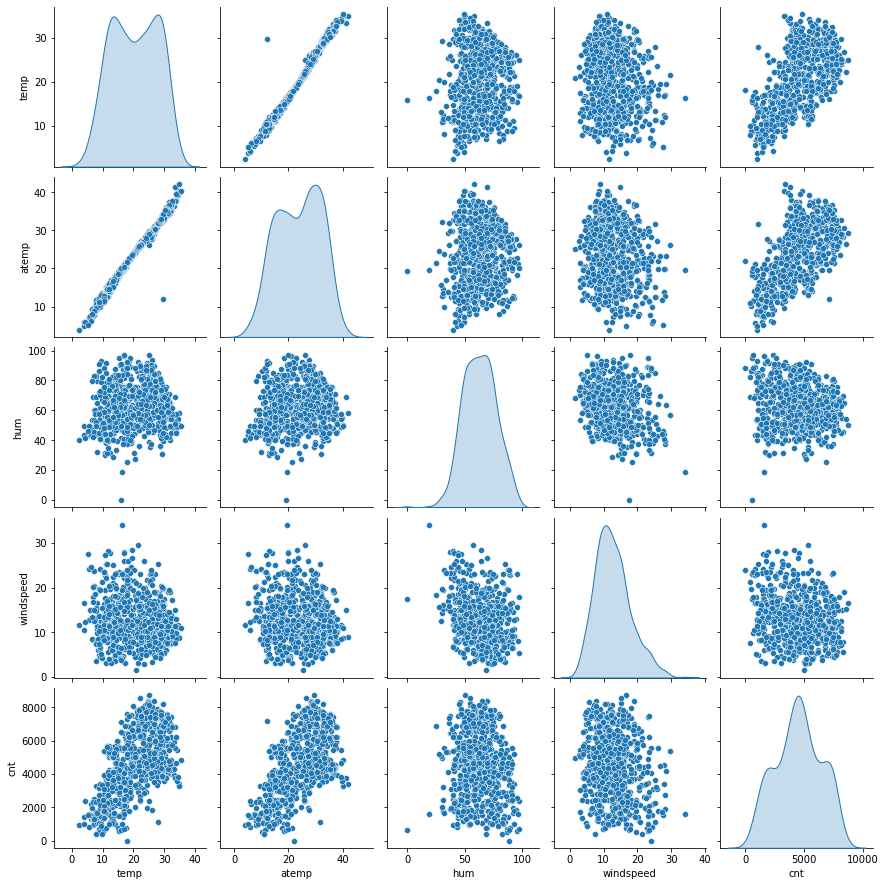

In [18]:
#Visualize the numeric columns using pairplot to study co-relations between them

sns.pairplot(x_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt'],y_vars=['temp', 'atemp', 'hum', 'windspeed','cnt'], data = bike, diag_kind='kde')
plt.show()


### Inference

1. There exists a strong co-relation between temp and atemp variable
2. Also there's a fair co-relation between temp/atemp and cnt, knowing temp would add value to business
3. Same can be vislualized using heatmap displaying co-relation values

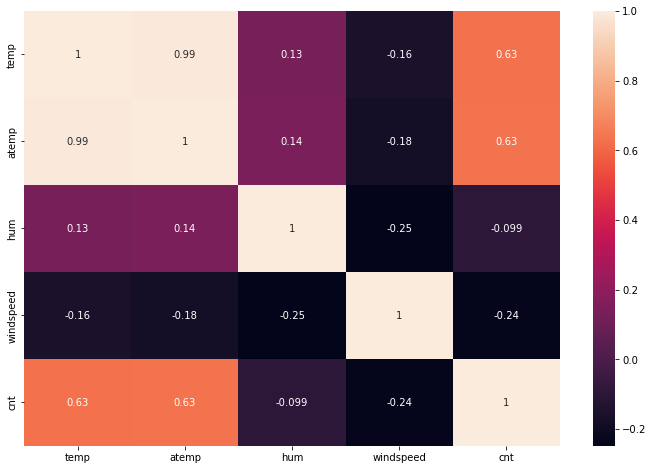

In [19]:
#Same can be vislualized using heatmap displaying co-relation values
cor_df = bike[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(cor_df,annot=True)
plt.show()

### Inference
1. Corelation between temp and atemp is 0.99
2. Corelation between temp/atemp and cnt is 0.63

### Categorical Variable Visualisation
Let's visualize if the categorical variables adds value to the count of bike registraions

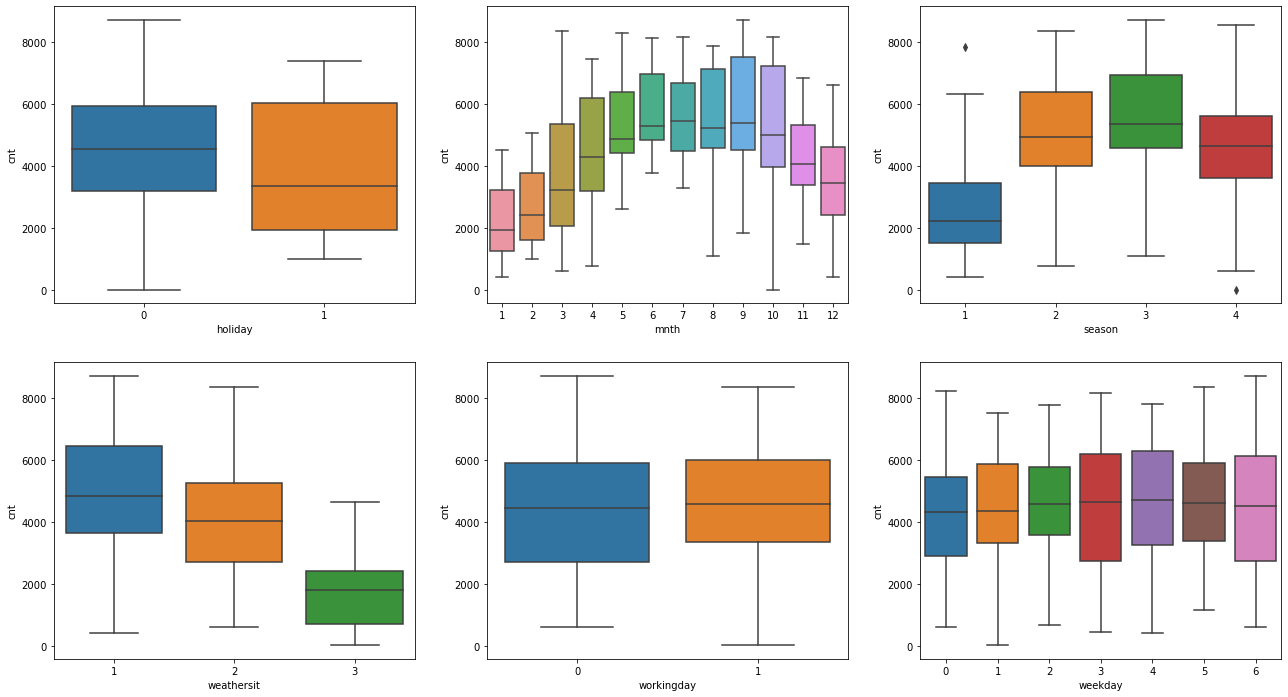

In [20]:
# We could use the categorical variable from master data to study the impact
# Using boxplot to examine the spread of data w.r.t cnt (Target) variable and find out visible median differences if any

plt.figure(figsize=(22, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)

plt.subplot(2,3,3)
sns.boxplot(x = 'season', y = 'cnt', data = data)

plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)

plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)

plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)

plt.show()


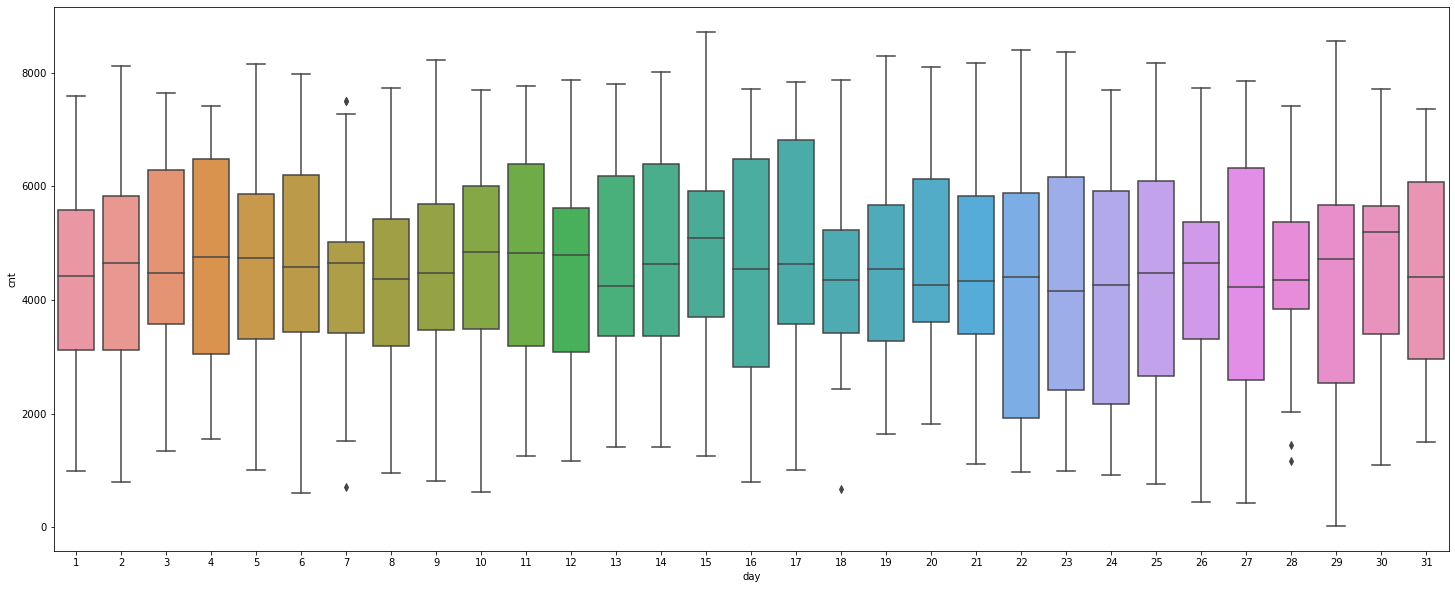

In [21]:
plt.figure(figsize=(25, 10))
sns.boxplot(x = 'day', y = 'cnt', data = data)

plt.show()

### Inference

- **holiday**: About 97.62% of the bike registrations happened on a non-holiday which may also means that the data was mostly recorded during non-holidays. Hence, holiday CANNOT be used as a good predictor for the dependent variable.
- **mnth**: About 10% of the bike registrations happened in the months 5,6,7,8 and 9 with a median of about 4000 registrations per month. This indicates, month has valid trends for registrations and can be a good predictor for the dependent variable.
- **season**: About 32% of the bike registrations happened in the season3 with a median of about 5000 registrations per month. Season2 & season4 had 27% & 25% of total registrations.This indicates, season has valid trends for registrations and can be a good predictor for the dependent variable.
- **weathersit**: About 67% of the bike registrations were happened during ‘weathersit1 with a median of about 5000 registrations. Weathersit2 had 30% of total registrations. This indicates, weathersit has valid trends towards the bike registrations can be a good predictor for the dependent variable.
- **workingday**: About 69% of the bike registrations happened in ‘workingday’ with a median of about 5000 registrations. This indicates, workingday can be a good predictor for the dependent variable.
- **Weekday**: About 13.5%-14.8% of total registrations on all days of the week having their independent medians ranging from 4000 to 5000 registrations. The variable can or cannot turn out to be a good predictor
- **day** : Day variable does not seem to show a good trend hence may not be useful in predicting the bike registrations count

In [22]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3', 'day_2',
       'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31'],
      dtype='object')

From above inferences we observe that day does not add high weightage value in prediction of cnt variable hence dropping it to avoid large number of noise in the dataset



In [23]:
# To drop day variables starting from day_2 to day_31
bike.drop(['day_'+str(i) for i in range(2,32)], axis = 1, inplace=True)

In [24]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

### Corelation Matrix
For entire dataset - to find out multicollineairy 

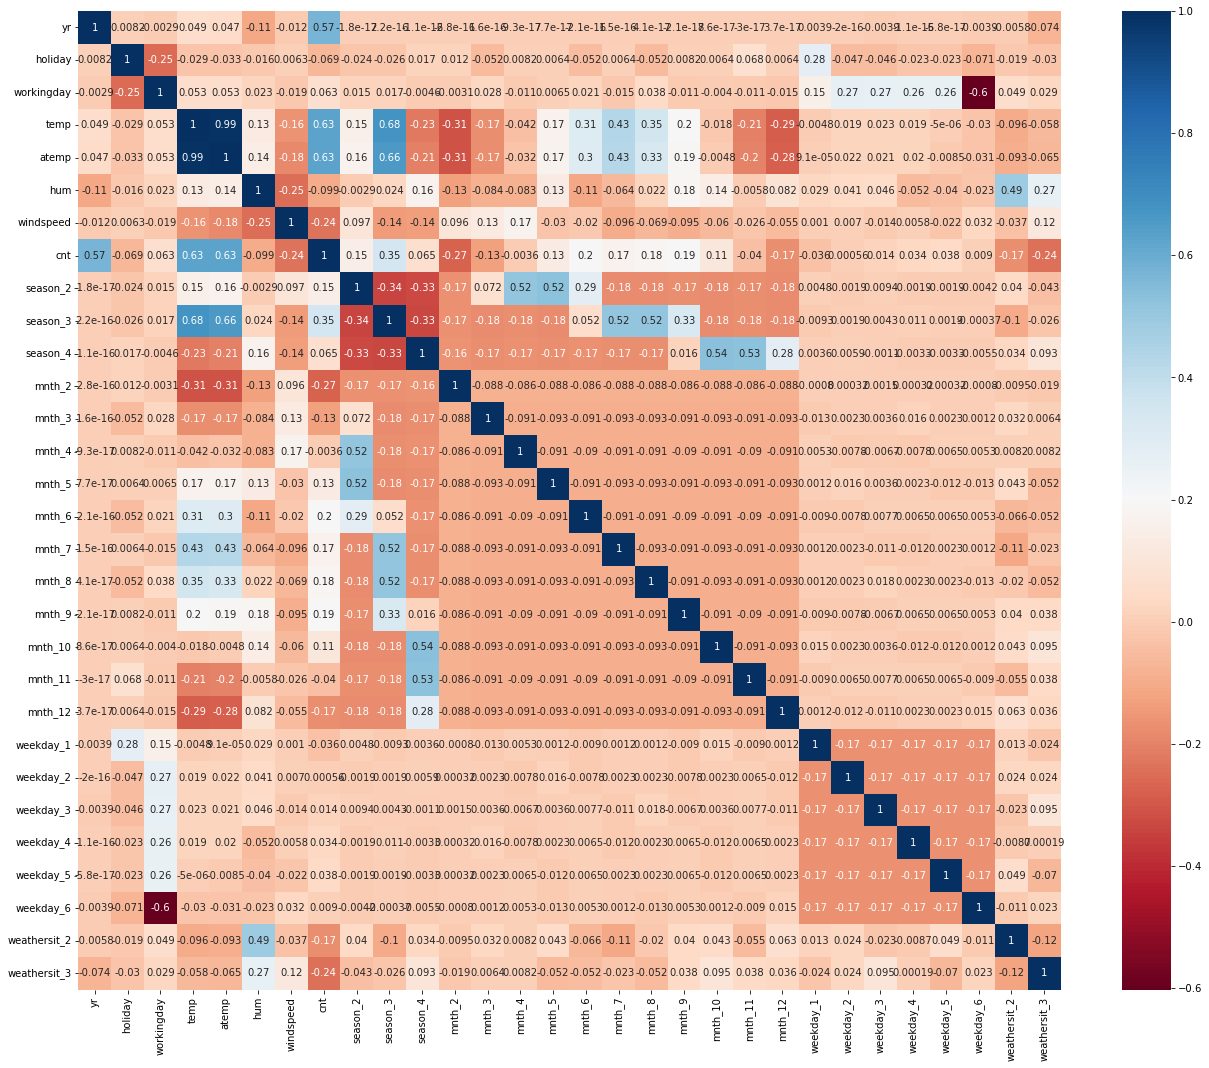

In [25]:
# Let's find out the correlation coefficients to see which variables are highly correlated and can be further utlised in model building

plt.figure(figsize = (22,18))
sns.heatmap(bike.corr(), annot = True, cmap="RdBu")
plt.show()


### Test Train Split
Splitting the data to Train and Test in 70-30 ratio

In [28]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
train, test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 333)

In [29]:
print('There are total {} rows in Train Dataset'.format(train.shape[0]))
print('There are total {} rows in Test Dataset'.format(test.shape[0]))

There are total 510 rows in Train Dataset
There are total 219 rows in Test Dataset


### Scaling the attributes
Scaling the numerical attributes from training dataset to bring uniformity

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
train[num_vars] = scaler.fit_transform(train[num_vars])

#Display values after scaling
train[['temp', 'atemp', 'hum', 'windspeed','cnt']].head()

,temp,atemp,hum,windspeed,cnt
483,0.497426,0.487055,0.609956,0.194850,0.722734
650,0.416433,0.409971,0.513852,0.255118,0.815347
212,0.887856,0.819376,0.572294,0.276919,0.488265
714,0.378013,0.381804,0.871429,0.161523,0.433042
8,0.098690,0.048706,0.451083,0.700017,0.092039


### RFE
Recursive feature elimination

In [32]:
y_train = train.pop('cnt')
X_train = train

In [33]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,1,0,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,1,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,1,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y_train

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
         ...   
467    0.733548
444    0.714220
46     0.240796
374    0.411413
366    0.221928
Name: cnt, Length: 510, dtype: float64

In [36]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# RFE
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 13),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 14),
 ('weekday_1', False, 6),
 ('weekday_2', False, 12),
 ('weekday_3', False, 10),
 ('weekday_4', False, 11),
 ('weekday_5', False, 9),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
X_train_rfe.head(3)

,yr,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
483,1,0,0.497426,0.487055,0.609956,0.194850,1,0,0,0,0,0,0,0,0
650,1,0,0.416433,0.409971,0.513852,0.255118,0,0,1,0,0,1,1,0,0
212,0,1,0.887856,0.819376,0.572294,0.276919,0,1,0,0,0,0,0,0,0


# Linear Regression Model Building
Using Statsmodel

In [42]:
import statsmodels.api as sm

## Model 1
To Check VIF

In [43]:
# Import VIF Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# Create a dataframe with feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,384.22
3,atemp,363.12
4,hum,17.52
7,season_3,7.09
5,windspeed,4.71
1,workingday,4.61
6,season_2,3.54
8,season_4,3.01
13,weathersit_2,2.14
0,yr,2.02


In [45]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [46]:
# Parameters
lr1.params

const           0.195340
yr              0.228741
workingday      0.040787
temp            0.433878
atemp           0.058635
hum            -0.178382
windspeed      -0.184925
season_2        0.130228
season_3        0.079599
season_4        0.153475
mnth_3          0.047149
mnth_9          0.100017
mnth_10         0.054370
weekday_6       0.054618
weathersit_2   -0.047472
weathersit_3   -0.271174
dtype: float64

In [47]:
# Check summary statistics
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.28e-186
Time:                        22:39:06   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576   

### Inference
Removing the variable 'atemp' based on its High p-value & High VIF

## Model 2
To Check VIF

In [48]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [49]:
# Create a dataframe with feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns

vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.21
3,hum,17.23
6,season_3,7.01
1,workingday,4.60
4,windspeed,4.55
5,season_2,3.54
7,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
11,weekday_6,1.79


In [50]:
# Adding constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [51]:
# Parameters

lr2.params

const           0.196221
yr              0.228723
workingday      0.040773
temp            0.489280
hum            -0.177805
windspeed      -0.187198
season_2        0.130352
season_3        0.078664
season_4        0.153732
mnth_3          0.047295
mnth_9          0.100029
mnth_10         0.054438
weekday_6       0.054705
weathersit_2   -0.047620
weathersit_3   -0.271535
dtype: float64

In [52]:
# Check summary statistics
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.00e-187
Time:                        22:39:19   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627   

### Inference
- Removing the variable 'hum' based on its Very High 'VIF' value
- We know based off domain knowledge that temperature can come out as import factor influencing the count of bicycle registration

## Model 3
To Check VIF

In [53]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [54]:
# Create a dataframe with feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns

vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.81
5,season_3,6.75
3,windspeed,4.27
1,workingday,4.11
4,season_2,3.51
6,season_4,2.89
0,yr,2.02
9,mnth_10,1.66
10,weekday_6,1.66
11,weathersit_2,1.54


In [55]:
# Adding constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [56]:
# Parameters

lr3.params

const           0.091594
yr              0.233129
workingday      0.042443
temp            0.456709
windspeed      -0.148815
season_2        0.131914
season_3        0.087922
season_4        0.150243
mnth_3          0.055303
mnth_9          0.091371
mnth_10         0.053320
weekday_6       0.055451
weathersit_2   -0.077149
weathersit_3   -0.324223
dtype: float64

In [57]:
# Check summary statistics
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.52e-184
Time:                        22:39:32   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0916      0.020      4.509   

### Inference
- Removing the variable 'season_3' based on its Very High 'VIF' value
- We know based off domain knowledge that temperature can come out as import factor influencing the count of bicycle registration

## Model 4
To Check VIF

In [58]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [59]:
# Create a dataframe with feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns

vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.07
0,yr,2.01
5,season_4,1.98
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


In [60]:
# Adding constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [61]:
# Parameters

lr4.params

const           0.076726
yr              0.231340
workingday      0.042231
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64

In [62]:
# Check summary statistics
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.56e-181
Time:                        22:39:58   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0767      0.020      3.775   

### Inference
- Removing the variable 'workingday' based on its High 'P' value
- We know based off domain knowledge that temperature can come out as import factor influencing the count of bicycle registration

## Model 5
To Check VIF

In [63]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [64]:
# Create a dataframe with feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns

vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.00
2,windspeed,3.70
0,yr,2.00
4,season_4,1.93
7,mnth_10,1.63
3,season_2,1.56
9,weathersit_2,1.50
6,mnth_9,1.23
8,weekday_6,1.17
5,mnth_3,1.13


In [65]:
# Adding constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5= sm.OLS(y_train, X_train_lm5).fit()

In [66]:
# Parameters

lr5.params

const           0.110901
yr              0.231482
temp            0.568593
windspeed      -0.155724
season_2        0.083225
season_4        0.117958
mnth_3          0.045855
mnth_9          0.103480
mnth_10         0.042091
weekday_6       0.023067
weathersit_2   -0.075584
weathersit_3   -0.311828
dtype: float64

In [67]:
# Check summary statistics
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.69e-180
Time:                        22:40:17   Log-Likelihood:                 481.99
No. Observations:                 510   AIC:                            -940.0
Df Residuals:                     498   BIC:                            -889.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1109      0.018      6.050   

### Inference
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Model Inerpretation

===============================<br>
### Coeffecients    

===============================
                   
* const =              0.1109     
* yr =                0.2315         
* temp =              0.5686
* windspeed =         -0.1557
* season_2 =        0.0832     
* season_4 =        0.1180     
* mnth_3 =          0.0459     
* mnth_9 =          0.1035     
* mnth_10 =         0.0421     
* weekday_6 =       0.0231      
* weathersit_2 =    -0.0756      
* weathersit_3 =   -0.3118
     

===============================


It is observed that all our coefficients are not equal to zerowhich means **We REJECT the NULL HYPOTHESIS**

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

## F-Statistics 
It is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 211.7
- Prob (F-statistic): 8.69e-180

The F-Statistics value of 211.7 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

## Best Fit Line : Final model

cnt = 0.1109 + (**yr** x 0.2315) + (**temp** x 0.5686) - (**windspeed** x 0.1557) + (**season_2** x 0.0832) + (**season_4** x 0.1180) + (**mnth_3** x 0.0459) + (**mnth_9** x 0.1035) + (**mnth_10** x 0.0421) + (**weekday_6** x 0.0231) - (**weathersit_2** x 0.0756) - (**weathersit_3** x 0.3118) 


### Influence of co-effecients in bike registration counts

**const:** The Constant value of ‘0.1109’ indicated that, in the absence of all other predictor variables. The bike registrations can still go up by 0.1109 units.

**yr:** A coefficient value of ‘0.2315’ indicated that a unit increase in yr variable, increases the bike registrations by 0.2315 units.

**temp:** A coefficient value of ‘0.5686’ indicated that a unit increase in temp variable, increases the bike registrations by 0.5686 units.

**windspeed:** A coefficient value of ‘0.1557’ indicated that a unit increase in windspeed variable, increases the bike registrations by 0.1557 units.

**season_2:** A coefficient value of ‘0.0832’ indicated that a unit increase in season_2 variable, increases the bike registrations by 0.0832 units.

**season_4:** A coefficient value of ‘0.1180’ indicated that a unit increase in season_4 variable, increases the bike registrations by 0.1180 units.

**mnth_3:** A coefficient value of ‘0.0459’ indicated that a unit increase in mnth_3 variable, increases the bike registrations by 0.0459 units.

**mnth_9:** A coefficient value of ‘0.1035’ indicated that a unit increase in mnth_9 variable, increases the bike registrations by 0.1035 units.

**mnth_10:** A coefficient value of ‘0.0421’ indicated that a unit increase in mnth_10 variable, increases the bike registrations by 0.0421 units.

**weekday_6:** A coefficient value of ‘0.0231’ indicated that a unit increase in weekday_6 variable, increases the bike registrations by 0.0231 units.

**weathersit_2:** A coefficient value of ‘-0.0756’ indicated that, w.r.t weathersit_2, a unit increase in holiday variable, decreases the bike registrations by 0.0756 units.

**weathersit_3:** A coefficient value of ‘-0.3118’ indicated that, w.r.t weathersit_3, a unit increase in holiday variable, decreases the bike registrations by 0.3118 units.


## Assumption Violation check

### 1. Distribution of Errors

In [68]:
y_train_pred = lr5.predict(X_train_lm5)

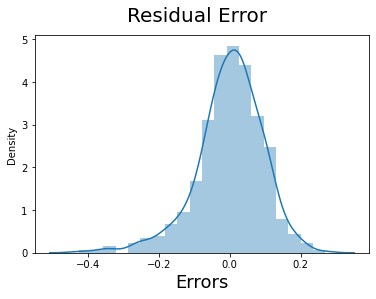

In [69]:
res = y_train-y_train_pred

# Plot the error histogram
fig = plt.figure()

sns.distplot((res), bins = 20)
fig.suptitle('Residual Error', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.show()

### Inference
- We observe that the errors are normally distributed around the mean zero hence assumption holds valid

### 2. Linear relationship between X and Y

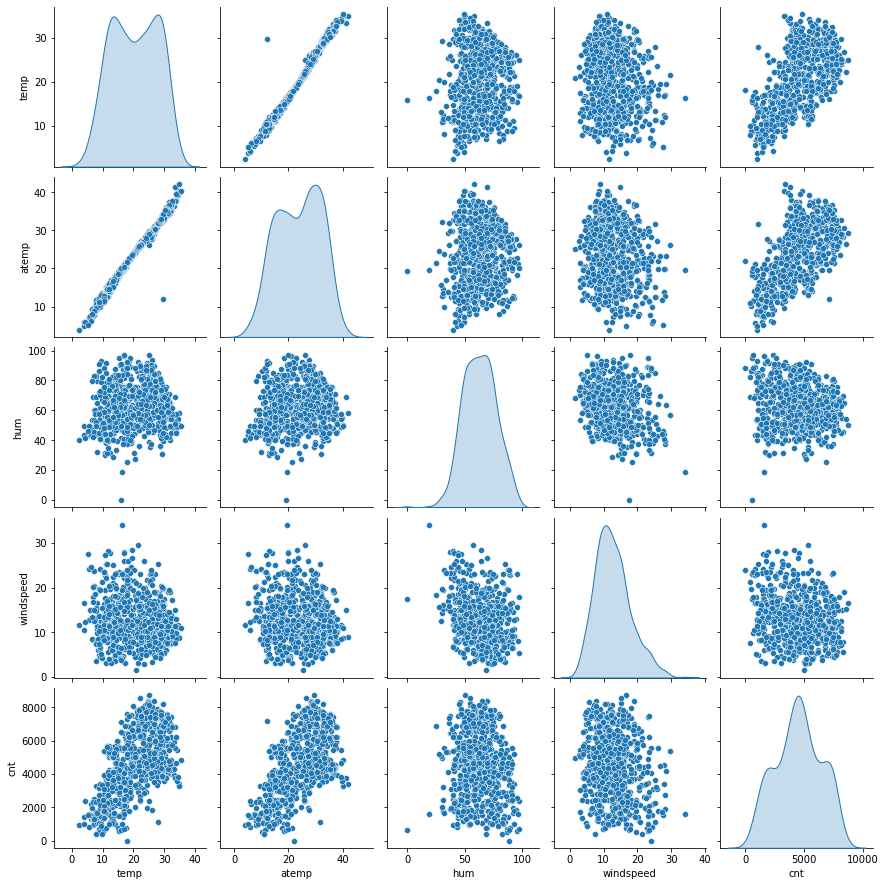

In [70]:
bike_numeric=bike[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_numeric, diag_kind='kde')
plt.show()

### Inference
- We had observed that there's a linear relation between X and Y which holds the assumption valid

### 3. Multicolinearity between predictors

In [71]:
vif

,Features,VIF
1,temp,4.00
2,windspeed,3.70
0,yr,2.00
4,season_4,1.93
7,mnth_10,1.63
3,season_2,1.56
9,weathersit_2,1.50
6,mnth_9,1.23
8,weekday_6,1.17
5,mnth_3,1.13


### Inference
- From the final model and VIF of the attributes it's evident that the VIF is low and hence there's no multicolinearity

## Prediction using Model 5
Given that our model seems to be sound in terms of assumptions and co-effecient parameters. Let's use it to predict cnt on our test dataset

In [72]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

#Please note that train was scaled before modelling, performing similar operation on test dataset
test[num_vars] = scaler.transform(test[num_vars])

In [73]:
test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [74]:
#convert into X_test and y_test
y_test = test.pop('cnt')
X_test = test

In [75]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [76]:
#Selecting the variables from the final model
col1=X_train_new.columns
X_test=X_test[col1]

# Adding constant variable to test dataset
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_3        219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   mnth_10       219 non-null    uint8  
 9   weekday_6     219 non-null    uint8  
 10  weathersit_2  219 non-null    uint8  
 11  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 10.3 KB


In [77]:
# Making predictions using the final model

y_pred = lr5.predict(X_test_lm5)

## Evaluate Model

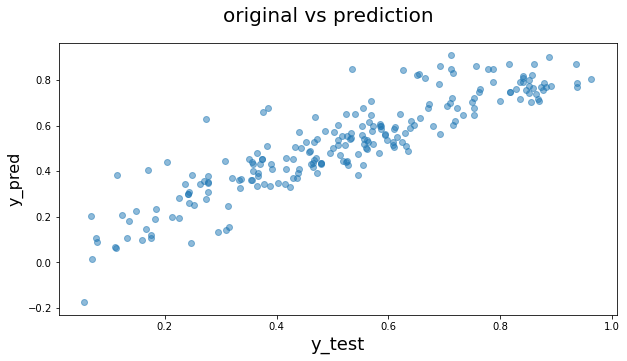

In [78]:
# Plotting y_test and y_pred to study the spread

fig = plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('original vs prediction', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### Model Metrics

In [81]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

In [82]:
#Adjusted R square
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p)
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print('R square of the model is {}'.format(round(r2,2)))
print('Adjusted R square of the model is {}'.format(round(adjusted_r2,2)))

R square of the model is 0.81
Adjusted R square of the model is 0.8


### Inference
- The above appears to be good model given that R square and adjusted R square does not show major deviations and hence we have achieved a good generalised model


## Report

- Looking at the beta co-efficient values, the top 3 influencing variables would be **temp**, **yr** and **windspeed**
- These features alone can be used to plan better and improve the bike registrations count

Feature Details:
- **temp** : temperature in Celsius
- **yr** : registration year
- **windspeed** : wind speed

**Author : Roshan Choudhary**<br>
**Notebook Ends Here!**